In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
messi=pd.read_csv('D:\messi.csv')

In [5]:
messi.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04/05,LaLiga,34,05-01/05,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho
1,05/06,UEFA Champions League,Group Stage,11-02/05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo
3,05/06,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho


In [6]:
messi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            699 non-null    object
 1   Competition       699 non-null    object
 2   Matchday          699 non-null    object
 3   Date              699 non-null    object
 4   Venue             699 non-null    object
 5   Club              699 non-null    object
 6   Opponent          699 non-null    object
 7   Result            699 non-null    object
 8   Playing_Position  699 non-null    object
 9   Minute            699 non-null    object
 10  At_score          699 non-null    object
 11  Type              698 non-null    object
 12  Goal_assist       486 non-null    object
dtypes: object(13)
memory usage: 71.1+ KB


In [7]:
messi.isnull().sum()

Season                0
Competition           0
Matchday              0
Date                  0
Venue                 0
Club                  0
Opponent              0
Result                0
Playing_Position      0
Minute                0
At_score              0
Type                  1
Goal_assist         213
dtype: int64

In [8]:
messi.shape

(699, 13)

In [9]:
messi[messi.Type.isnull()]

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
22,06/07,LaLiga,37,06/09/07,H,FC Barcelona,RCD Espanyol Barcelona,2:02,RW,43,1:01,NaN,Gianluca Zambrotta


In [10]:
position=messi.Playing_Position.value_counts()
position

CF     273
RW     221
RW      95
CF      40
SS      32
SS      21
AM       9
AM       7
LW       1
Name: Playing_Position, dtype: int64

**now we will trying to know the the best position for messi**

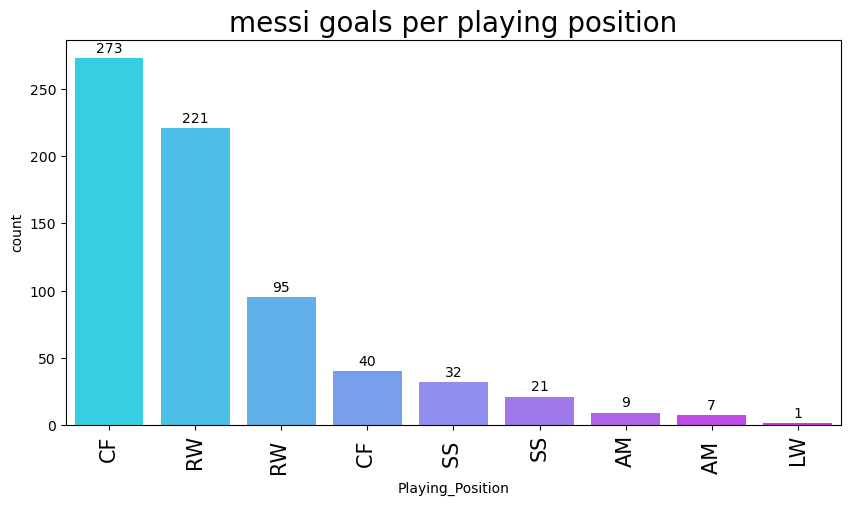

In [12]:
plt.figure(figsize=(10,5))
p=sns.countplot(x=messi.Playing_Position,palette='cool',order=position.sort_values(ascending=False).index)
plt.title('messi goals per playing position',fontsize=20)
plt.xticks(fontsize=15,rotation=90)
for container in p.containers:  
    p.bar_label(container,label_type='edge',padding=2)

In [13]:
messi.Season=messi['Season'].replace('11-Dec','11/12')

In [14]:
messi.Season=messi['Season'].replace('Dec-13','12/13')
                                

In [15]:
messi.Season.to_csv('D:/365 data scinece/goals.csv')

**what is the best season for messi and what is the nubmer of goals at this season**

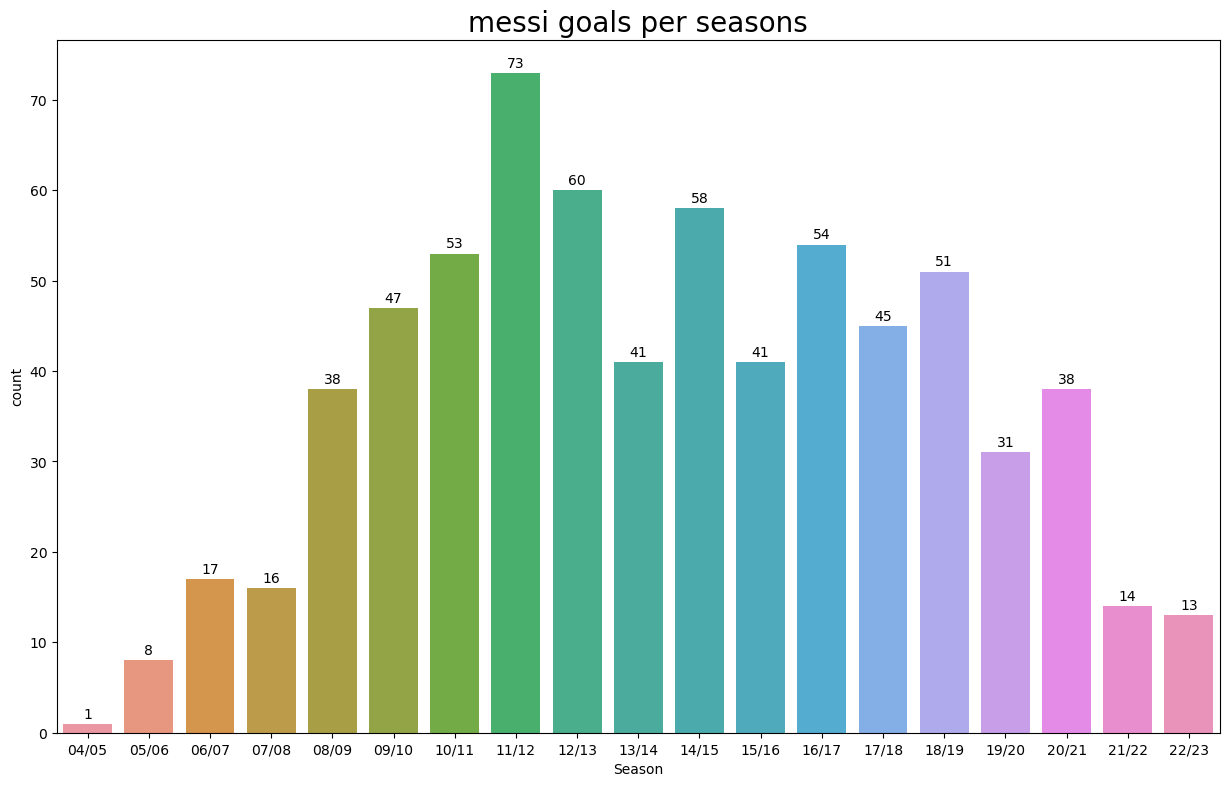

In [16]:
plt.figure(figsize=(15,9))
p=sns.countplot(x= messi['Season'],hue_order=messi.groupby('Competition'))
plt.title('messi goals per seasons',fontsize=20)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=2)

**What is Messi's favorite competition**

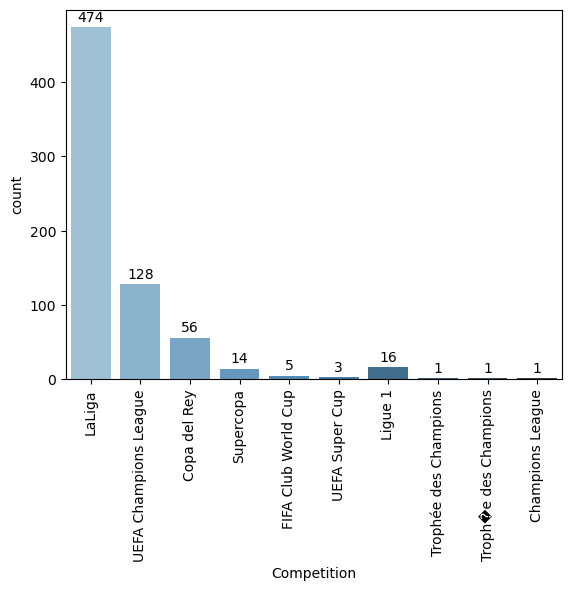

In [17]:
p=sns.countplot(x= messi.Competition,palette='Blues_d')
plt.xticks(rotation=90)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=2)
plt.show()

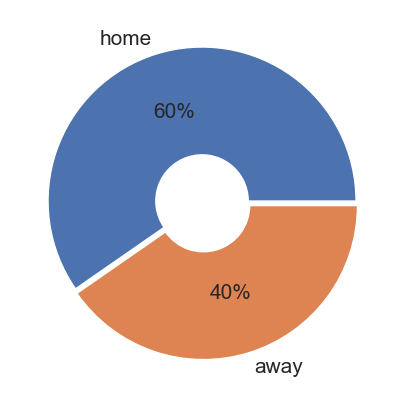

In [140]:
plt.pie(messi.Venue.value_counts(),labels=['home','away'],autopct='%1.0f%%', wedgeprops=dict(width=.7),explode=(0.01,0.021)
        ,  textprops={'fontsize': 15})
plt.show()

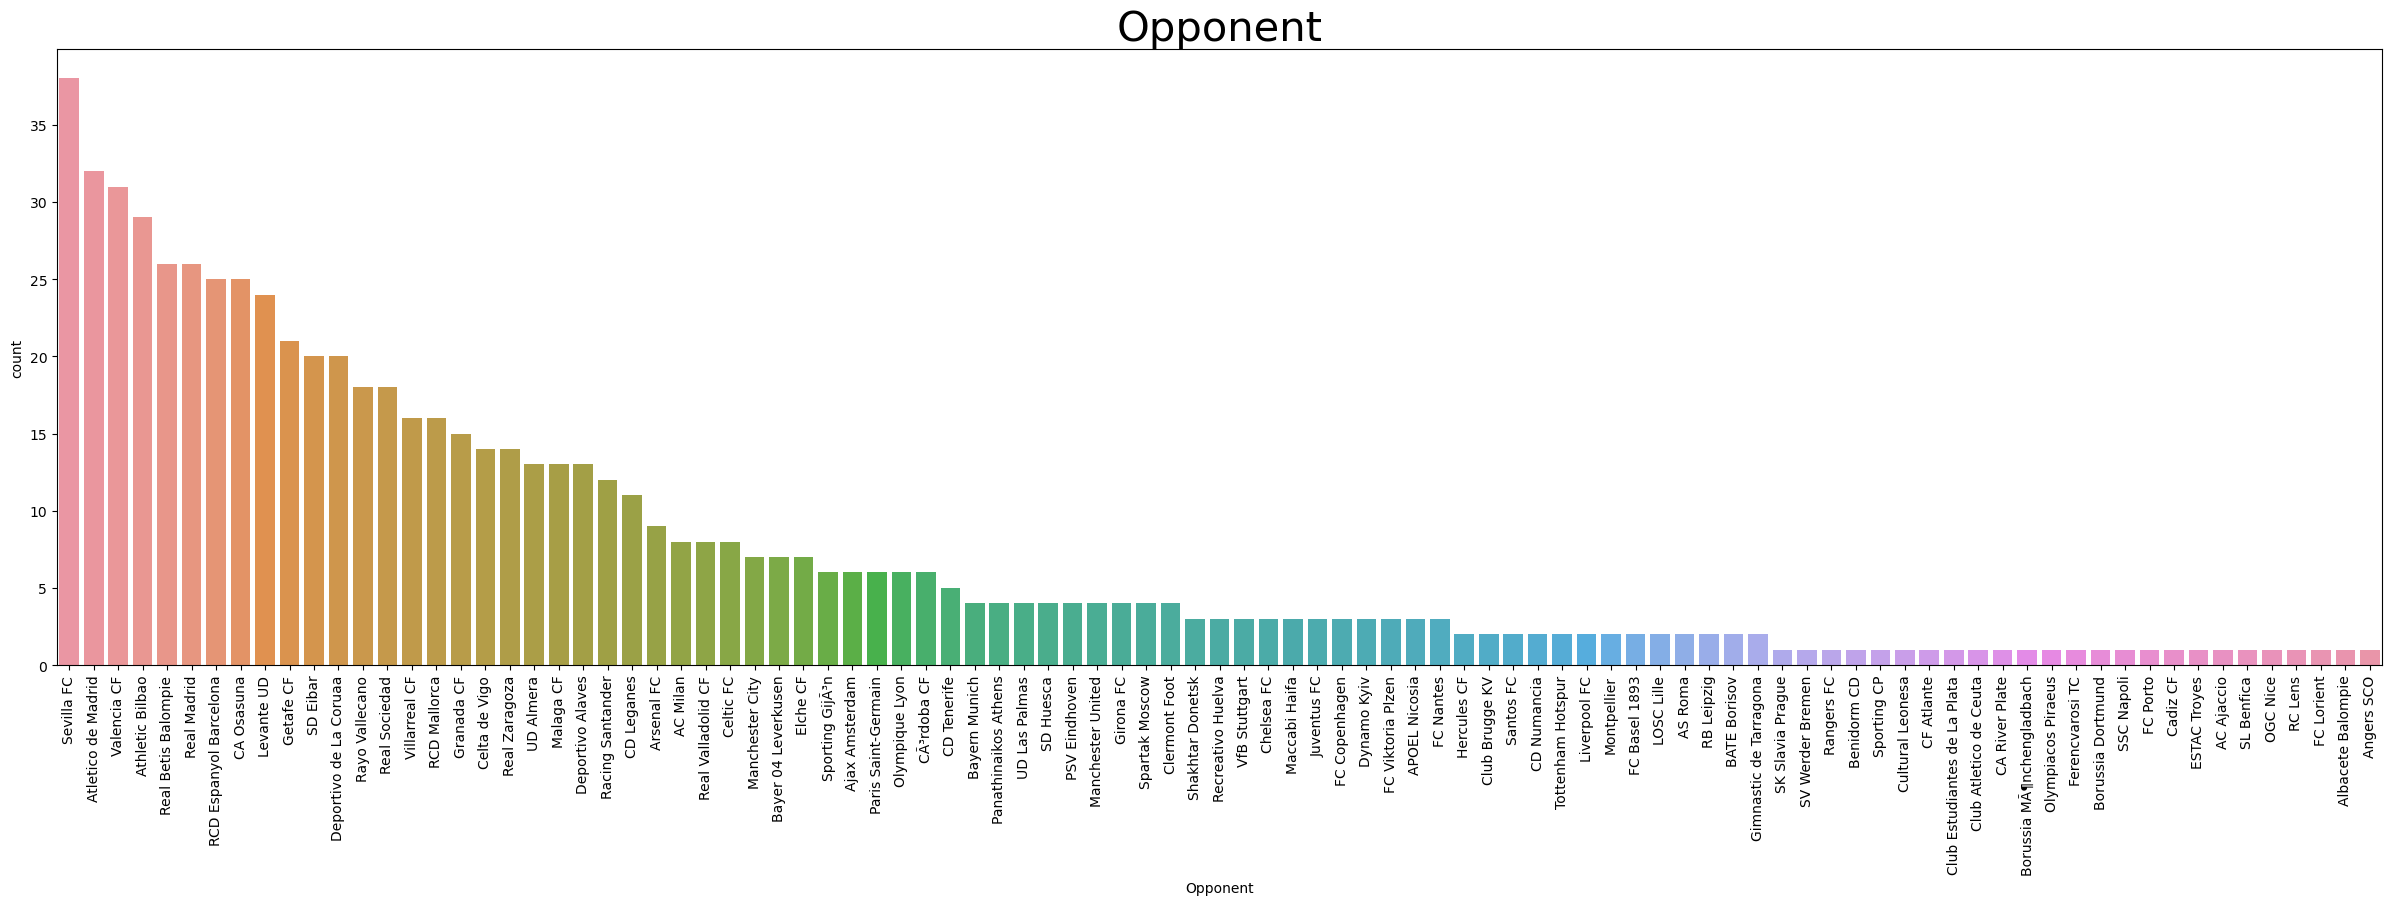

In [19]:
plt.figure(figsize=(30,8))
sns.countplot(x= messi.Opponent,order=messi.Opponent.value_counts().sort_values(ascending=False).index)
plt.title('Opponent',fontsize=30)
plt.xticks(fontsize=10,rotation=90)
plt.show()

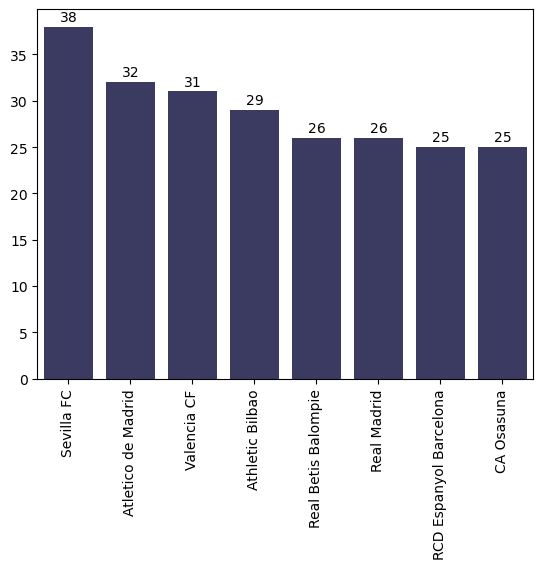

In [15]:
fav_opponent=messi.Opponent.value_counts()
fav_opponent=fav_opponent[fav_opponent.values>=25]
fav_opponent.to_csv('D:/365 data scinece/fav_opponent.csv')
p=sns.barplot(x=fav_opponent.index,y=fav_opponent.values,color='#353466')
plt.xticks(rotation=90)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=2)

**Sevilla FC the most club messi scored with goals**

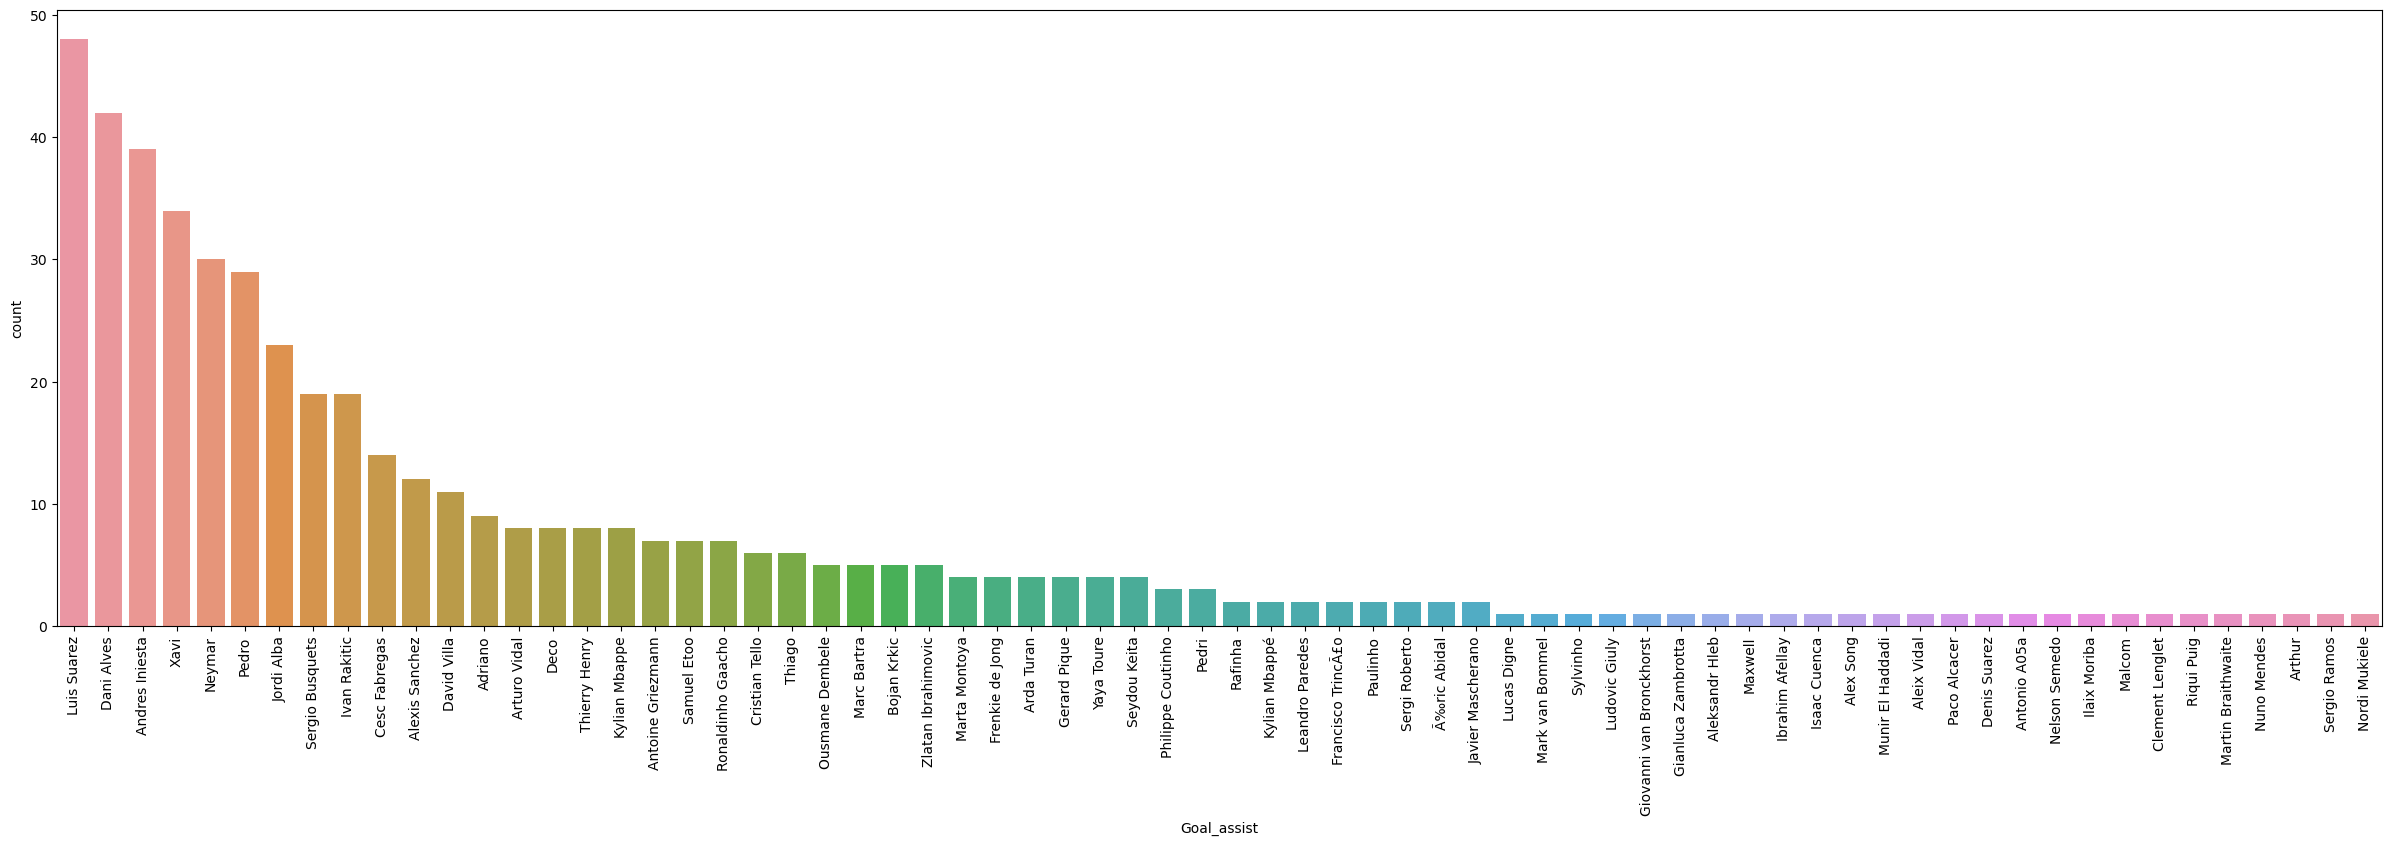

In [20]:
plt.figure(figsize=(30,8))
sns.countplot(x= messi.Goal_assist,order=messi.Goal_assist.value_counts().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

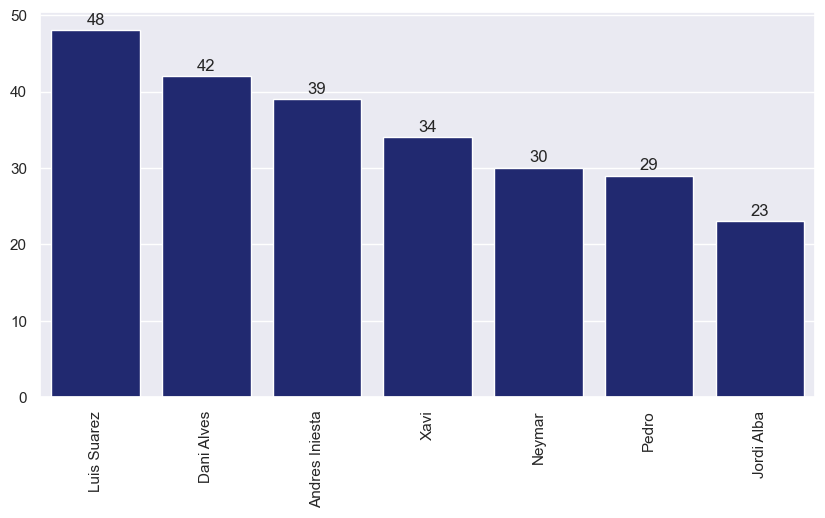

In [191]:
fav_assistant=messi.Goal_assist.value_counts()
fav_assistant=fav_assistant[fav_assistant.values>=20]
p=sns.barplot(x=fav_assistant.index,y=fav_assistant.values,color='#141f7d')
plt.xticks(rotation=90)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=2)

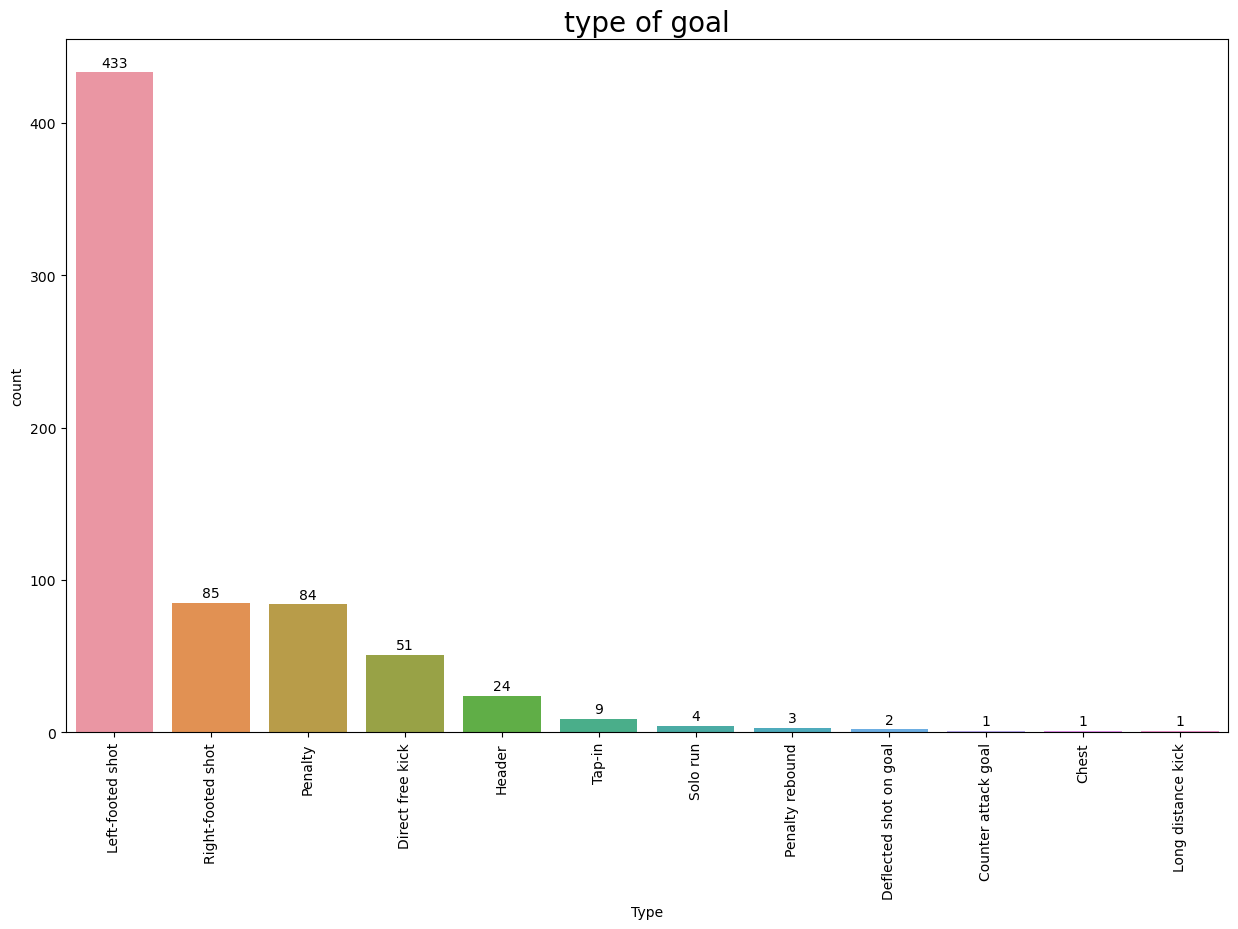

In [21]:
plt.figure(figsize=(15,9))
p=sns.countplot(x= messi['Type'],order=messi.Type.value_counts().sort_values(ascending=False).index)
plt.title('type of goal',fontsize=20)
plt.xticks(rotation=90)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=2)
plt.show()

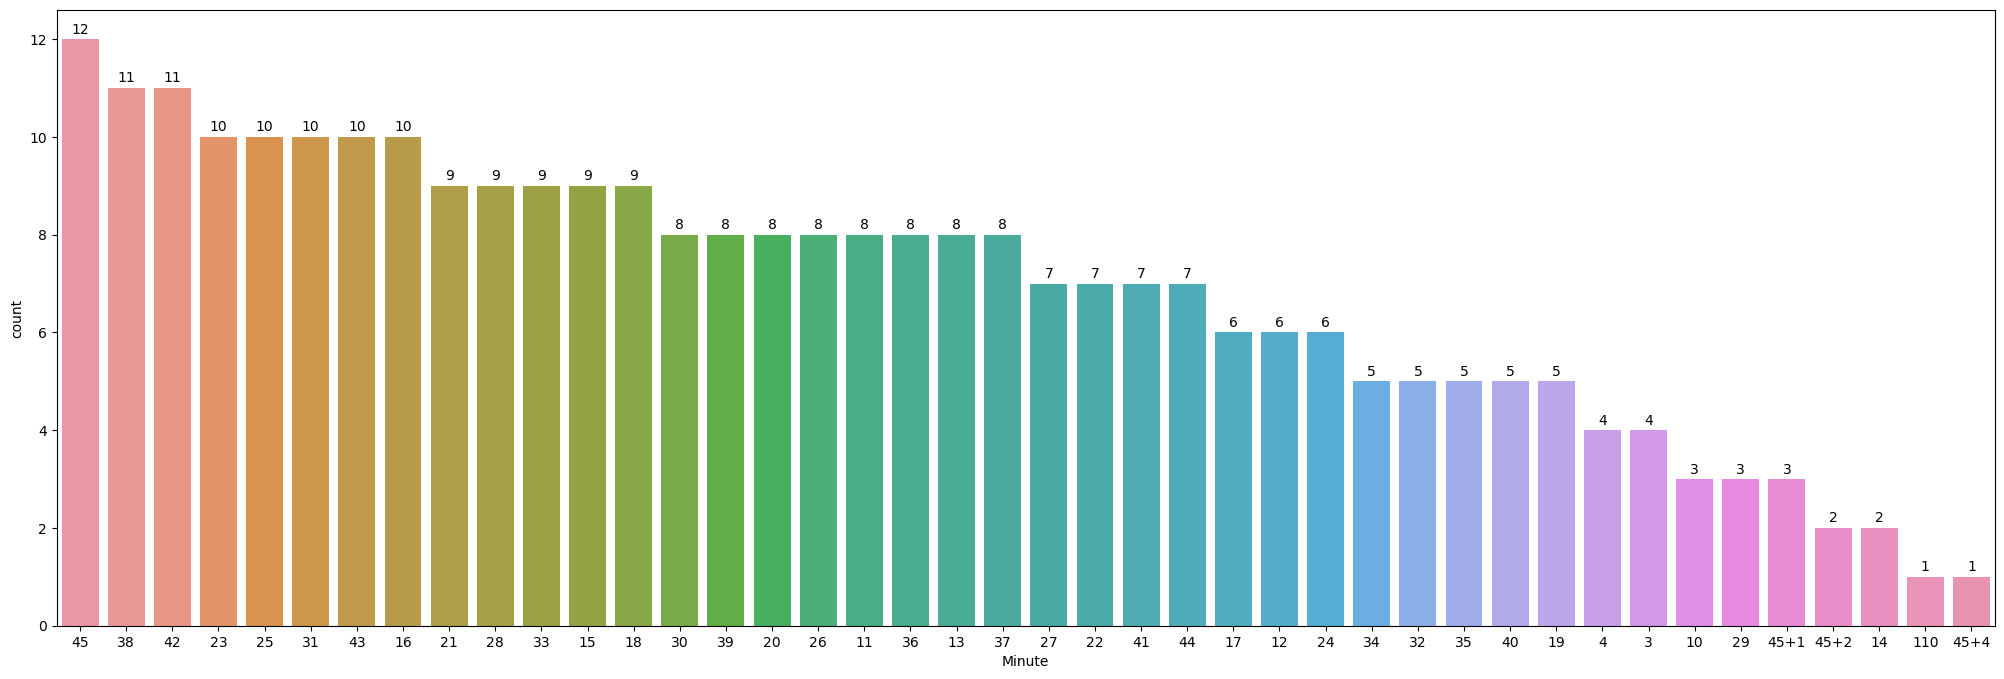

In [22]:
plt.figure(figsize=(25,8))
p=sns.countplot(x= messi.Minute[messi.Minute<'46'],order=messi.Minute[messi.Minute<'46'].value_counts().sort_values(ascending=False).index)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=2)

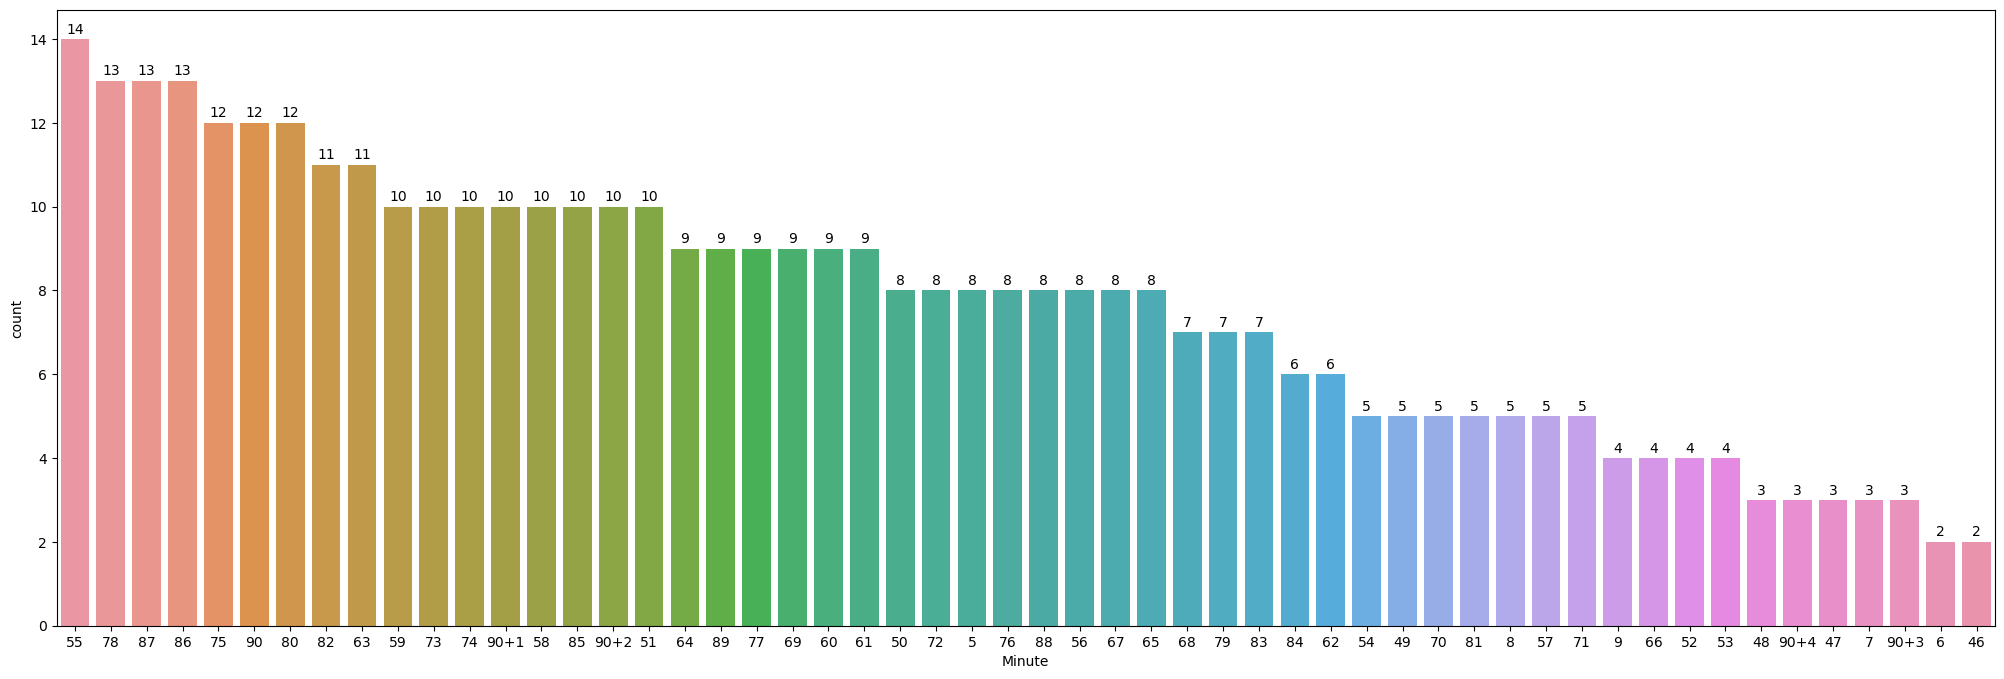

In [23]:
plt.figure(figsize=(25,8))
p=sns.countplot(x= messi.Minute[messi.Minute>='46'],order=messi.Minute[messi.Minute>='46'].value_counts().sort_values(ascending=False).index)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=2)

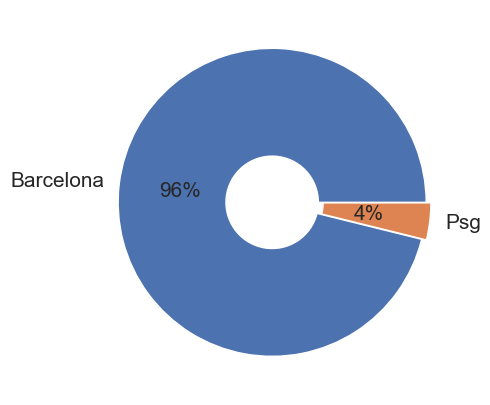

In [215]:
plt.pie(messi.Club.value_counts(),labels=['Barcelona','Psg'],autopct='%1.0f%%', wedgeprops=dict(width=.7),explode=(0.01,0.021)
        ,  textprops={'fontsize': 15})
plt.show()